# Modul 7
## Paulus Caesario Dito Putra Hartono
## 205314159

## Importing Libs

In [2]:
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer 

import os 
import string 
import numpy as np 
import copy 
import pandas as pd 
import pickle

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [3]:
from __future__ import division 
from matplotlib import pyplot as plt 
from scipy import stats 
import numpy as np
import seaborn as sns 
from statsmodels.base.model import GenericLikelihoodModel 
np.random.seed(123456789) 

In [4]:
pi = 0.3
lambda_ = 2.
mu = 3

In [5]:
!gdown --id '1uFgqSWkVIvo3aTRXFb0uv_mjIv3dfPHz' -O 20_newsgroups

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1uFgqSWkVIvo3aTRXFb0uv_mjIv3dfPHz 



In [6]:
title = "20_newsgroups"

In [7]:
paths = []
for (dirpath, dirnames, filenames) in os.walk(str(os.getcwd())+'/'+title+'/comp.graphics'):
    for i in filenames:
        paths.append(str(dirpath)+str("/")+i)
for (dirpath, dirnames, filenames) in os.walk(str(os.getcwd())+'/'+title+'/rec.motorcycles)'):
    for i in filenames:
        paths.append(str(dirpath)+str("/")+i)

In [ ]:
paths

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

url = "https://www.bbc.com/news/world-asia-62976842"

page=requests.get(url)
soup = bs(page.content, 'html.parser')

body_tag = soup.body

article = body_tag.find('article')

paragraphs = article.find_all(attrs={"data-component": "text-block"})

texts = []

for p in paragraphs:
  texts.append(p.text)

table = pd.DataFrame({
  "text": texts
})

table.to_csv('raw_text.csv')

table

,text
0,A Japanese man has set himself alight reported...
1,Hundreds of dignitaries from Japan and around ...
2,"On Wednesday, witnesses called police after sp..."
3,"Officers put out the blaze, and took the still..."
4,The extent of his injuries and his current con...
5,The government is yet to comment on the protes...
6,"Abe was shot dead on 8 July, aged 67, at a cam..."
7,But state funerals are not an established prac...
8,"One of the country's main opposition parties, ..."
9,"By Mariko Oi, BBC News"


### Preprocessing

In [ ]:
def remove_header(data):
    # try:
    ind = data.index('\n\n')
    data = data[ind:]
    # except:
        # print("No Header")
    return data

In [ ]:
def convert_lower_case(data):
    return np.char.lower(data)

In [ ]:
def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words:
            new_text = new_text + " " + w
    return np.char.strip(new_text)

In [ ]:
def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ')
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ',', '')
    return data

In [ ]:
def remove_apostrophe(data):
    return np.char.replace(data, "'", "")

In [ ]:
def remove_single_characters(data):
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if len(w) > 1:
            new_text = new_text + " " + w
    return np.char.strip(new_text)

In [ ]:
def convert_numbers(data):
    data = np.char.replace(data, "0", " zero ")
    data = np.char.replace(data, "1", " one ")
    data = np.char.replace(data, "2", " two ")
    data = np.char.replace(data, "3", " three ")
    data = np.char.replace(data, "4", " four ")
    data = np.char.replace(data, "5", " five ")
    data = np.char.replace(data, "6", " six ")
    data = np.char.replace(data, "7", " seven ")
    data = np.char.replace(data, "8", " eight ")
    data = np.char.replace(data, "9", " nine ")
    return data

In [ ]:
def stemming(data):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return np.char.strip(new_text)

In [ ]:
def preprocess(data, query):
    # if not query:
        # data = remove_header(data)        
    data = convert_lower_case(data)
    data = convert_numbers(data)
    data = remove_punctuation(data) #remove comma seperately
    data = remove_apostrophe(data)
    data = remove_single_characters(data)
    data = stemming(data)
    return data

# 1 Probabilistic Model (Unigram)

In [ ]:
paths = pd.read_csv('raw_text.csv')

postings = pd.DataFrame()
frequency = pd.DataFrame()
doc = 0
texts = []

for path in paths['text']:
    # file = open(path, 'r', encoding='cp1250')
    # text = file.read().strip()
    # file.close()
    preprocessed_text = preprocess(path, False)
    if doc%100 == 0:
        print(doc)

    tokens = word_tokenize(str(preprocessed_text))
    texts.append(preprocessed_text)
    
    pos = 0
    for token in tokens:
        if token in postings:
            p = postings[token][0]            

            k = [a[0] for a in p]
            if doc in k:
                for a in p:
                    if a[0] == doc:
                        a[1].add(pos)
            else:
                p.append([doc,{pos}])
                frequency[token][0] += 1
        else:
            postings.insert(value=[[[doc, {pos}]]], loc=0, column=token)
            frequency.insert(value=[1], loc=0, column=token)

        pos += 1
    doc += 1

frequency

0


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


,famili,bankrupt,him,target,charg,connect,been,have,parliament,more,...,at,protest,to,reportedli,alight,himself,set,ha,man,japanes
0,1,1,1,1,1,2,1,1,1,1,...,3,3,11,2,2,2,2,4,7,4


In [ ]:
postings

,famili,bankrupt,him,target,charg,connect,been,have,parliament,more,...,at,protest,to,reportedli,alight,himself,set,ha,man,japanes
0,"[[17, {23}]]","[[17, {21}]]","[[17, {10}]]","[[17, {9}]]","[[17, {2}]]","[[16, {19}], [17, {13}]]","[[16, {15}]]","[[16, {18, 14}]]","[[16, {13}]]","[[16, {9}]]",...,"[[0, {9}], [6, {10}], [10, {19}]]","[[0, {8}], [5, {8}], [7, {11}]]","[[0, {7}], [1, {11}], [3, {11}], [4, {19}], [5...","[[0, {6}], [11, {22}]]","[[0, {5}], [14, {12}]]","[[0, {4}], [14, {11}]]","[[0, {3}], [14, {10}]]","[[0, {2}], [5, {19}], [8, {11}], [16, {5}]]","[[0, {1}], [2, {7}], [3, {10}], [4, {16}], [14...","[[0, {0}], [4, {11}], [11, {4}], [13, {18}]]"


In [ ]:
def count(word, doc):
  doc = doc.split()
  result = doc.count(word)
  return result

In [ ]:
def calculateTF(queries, docs):
  tf = []
  filteredQueries = list(np.unique(queries))
  for d in range(len(docs)):
    tf.append([])
    for q in range(len(filteredQueries)):
      tf[d].append(count(filteredQueries[q], docs[d]))

  index = [x for x in range(len(docs))]
  df = pd.DataFrame(data=tf, index=index)
  df.columns=filteredQueries
  return df

## Method untuk mencari proabilitas query tertentu

In [ ]:
def get_word_postings(word):
  preprocessed_word = str(preprocess(word, True))
  print(preprocessed_word)
  print("Frequency:",frequency[preprocessed_word][0])
  print("Postings List:",postings[preprocessed_word][0])
  total=0
  # total
  for x in postings[preprocessed_word][0]:
    total += len(x)
  # Print probability
  i = 1
  for x in postings[preprocessed_word][0]:
    prob=len(x)/total
    print("Document ",i,":",prob)
    i+=1

## 2 Smoothing

### Jelineck-Mercer

In [ ]:
def zip_jm(x, lambda_=lambda_):
  if lambda_ < 0 or lambda_ > 1:
    return np.zeros_like(x)
  else:
    return (x==0)*(1-lambda_)*(kata/d)+lambda_*c

### Bayesian

In [ ]:
def zip_by(x, mu=mu):
  if mu < 0 or mu == maxsys.maxsize:
    return np.zeros_like(x)
  else:
    return (x==0) * (d/(d+mu)) * (kata/d) + (d/(d+mu)*c)
    

### Laplacian

In [ ]:
def zip_pmf(x, pi=pi, lambda_=lambda_):
  if pi < 0 or pi > 1 or lambda_ <= 0:
    return np.zeros_like(x)
  else:
    return (x==0)*pi+(1-pi)*stats.poisson.pmf(x,lambda_)

### Grafik

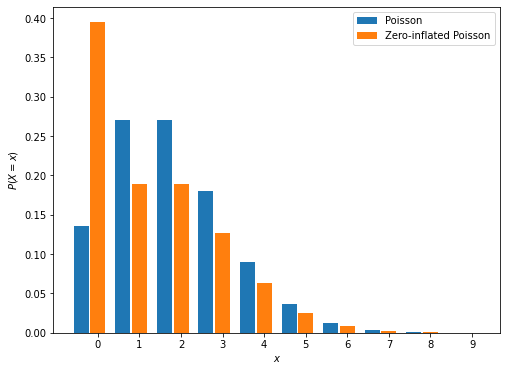

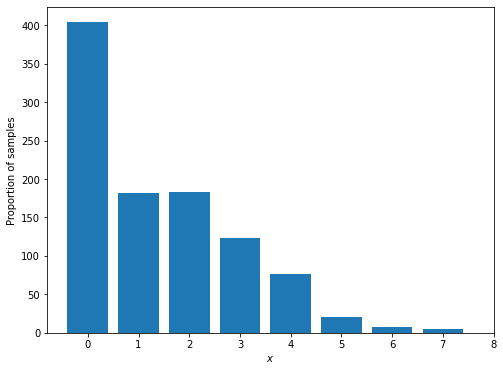

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
xs = np.arange(0,10)
palette = sns.color_palette()

ax.bar(2.5 * xs, stats.poisson.pmf(xs, lambda_), width=0.9, 
       color=palette[0], label='Poisson')
ax.bar(2.5 * xs + 1, zip_pmf(xs), width=0.9, 
       color=palette[1], label='Zero-inflated Poisson')
ax.set_xticks(2.5*xs+1)
ax.set_xticklabels(xs)
ax.set_xlabel('$x$')
ax.set_ylabel('$P(X = x)$')
ax.legend()
N = 1000

inflated_zero = stats.bernoulli.rvs(pi, size=N)
x = (1 - inflated_zero) * stats.poisson.rvs(lambda_, size=N)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(x, width=0.8, bins=np.arange(x.max() + 1));
ax.set_xticks(np.arange(x.max() + 1) + 0.4);
ax.set_xticklabels(np.arange(x.max() + 1));
ax.set_xlabel('$x$');
ax.set_ylabel('Proportion of samples');


## 3 Query likelihood model

In [ ]:
resultTF = calculateTF(tokens, np.array(texts))
resultTF

# tokens
# paths['text']

,abe,bankrupt,charg,church,connect,famili,for,had,he,hi,him,kill,man,said,target,the,to,which,with
0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,1,0,0
4,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,2,1,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2,0,2
6,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


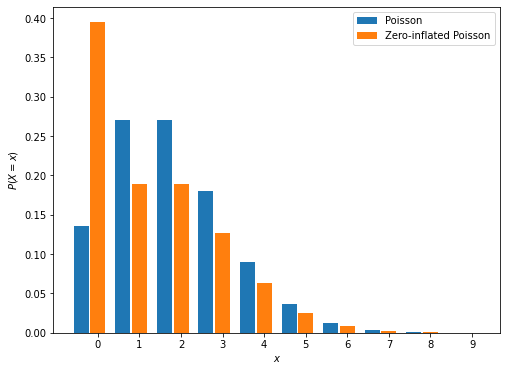

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
xs = np.arange(0, 10);
resultTF = np.arange(0, 10);
palette = sns.color_palette()
ax.bar(2.5 * xs, stats.poisson.pmf(xs, lambda_), width=0.9,
color=palette[0], label='Poisson');
ax.bar(2.5 * xs + 1, zip_pmf(resultTF), width=0.9, color=palette[1],label='Zero-inflated Poisson');
ax.set_xticks(2.5 * xs + 1);
ax.set_xticklabels(xs);
ax.set_xlabel('$x$');
ax.set_ylabel('$P(X = x)$');
ax.legend();